
# **Disclaimer:** #

It is important to note that while the analysis presented provides valuable insights into the soil characteristics along the selected transect lines in Bangor and Nant Peris, it is imperative to recognize that a single transect line may not comprehensively represent the entirety of soil types in both locations. Soil properties can exhibit significant variability over short distances due to factors such as microclimates, geological variations, and local land use practices. Therefore, the findings presented here offer a snapshot of the conditions along these specific transects and may not capture the full spectrum of soil characteristics within Bangor and Nant Peris. For a more comprehensive understanding, further studies incorporating a broader sampling approach and additional environmental variables are recommended.


#### This is based on my old A-Level Geogrpahy project ####

In [1]:
install.packages('reshape2')
install.packages("imager")


The downloaded binary packages are in
	/var/folders/p4/1qr3pd2x6t74jxpf3zxwjcnw0000gn/T//RtmpNvdNnR/downloaded_packages

The downloaded binary packages are in
	/var/folders/p4/1qr3pd2x6t74jxpf3zxwjcnw0000gn/T//RtmpNvdNnR/downloaded_packages


In [2]:
install.packages("gridExtra")


The downloaded binary packages are in
	/var/folders/p4/1qr3pd2x6t74jxpf3zxwjcnw0000gn/T//RtmpNvdNnR/downloaded_packages


In [3]:
library(ggplot2);
library(reshape2);
library(imager);
library(gridExtra);
library(GGally);

Loading required package: magrittr


Attaching package: 'imager'


The following object is masked from 'package:magrittr':

    add


The following objects are masked from 'package:stats':

    convolve, spectrum


The following object is masked from 'package:graphics':

    frame


The following object is masked from 'package:base':

    save.image


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# **Introduction**

The contrasting valley shapes of Bangor and Nant Peris, with the former being 'U'-shaped and the latter 'V'-shaped, likely have substantial implications on the environmental conditions and subsequently, the soil characteristics observed at both locations.

## Transects at Bangor and Nant Peris ##

The transects at Bangor and Nant Peris were strategically placed to cut across a section of the 'U'-shaped and 'V'-shaped valleys, respectively. The Bangor transect consisted of 12 sample points, while the Nant Peris transect included 11 sample points. This approach ensured a comprehensive representation of the varied topographical features within each valley.

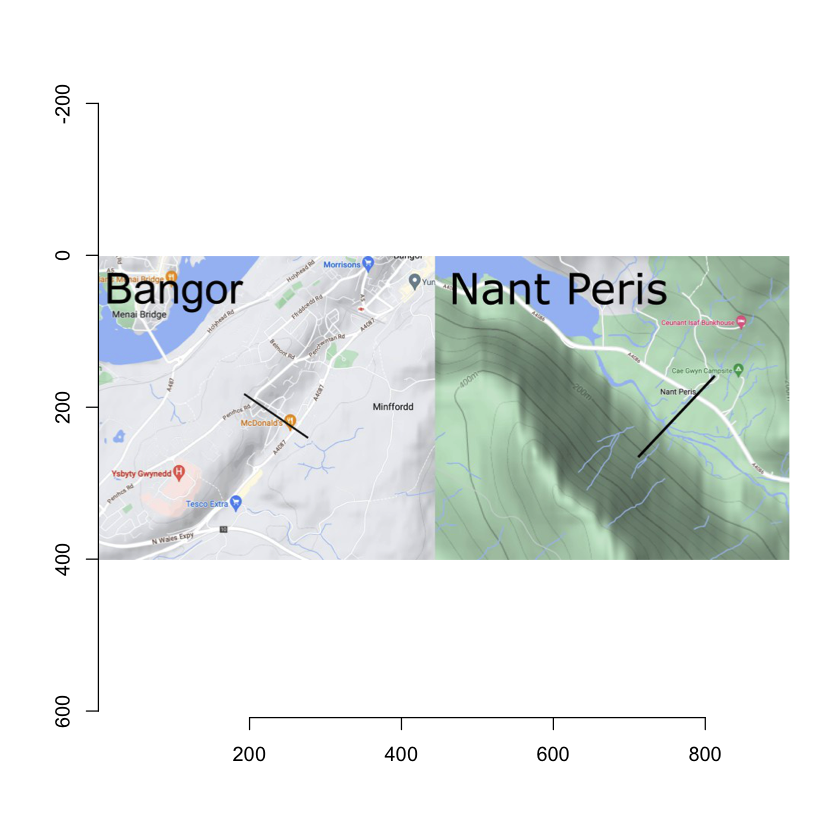

In [4]:
imgs_transect <- load.image("./Transect_images.jpg");
plot(imgs_transect)

In [5]:
# Load the data
data_bangor <- read.csv("./bangor_transect.csv")
data_peris <- read.csv("./peris_transect.csv")

# TO DO: #
explain what each variable is...
add hypothesis

In [6]:
data_bangor

X,Distance..m.,Height..m.,pH,Sample.Depth..cm.,Sedimentation.Time..mins.,Soil.Type,Ambient.Temp,Soil.Temp,Slope,Water.Content
<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,0,82,7.0,100,9,Silt,12,11.0,5,10.0
2,50,82,7.0,100,3,Sand,13,10.0,3,9.6
3,100,81,7.0,100,20,Silt,13,11.0,2,10.0
4,170,80,6.0,30,15,Silt & Humus,12,11.0,2,5.0
5,225,75,6.0,100,50,Clay,12,10.0,20,30.0
6,400,50,5.5,100,46,Clay,10,9.0,20,25.0
7,450,45,5.5,50,3,Stony & Sand,11,10.0,45,6.0
8,700,40,6.0,40,17,Silt & Clay,10,8.0,40,NaN
9,755,50,6.0,46,45,Clay,9,8.0,1,8.0


In [7]:
data_peris

X,pH,Sample.Depth..cm.,Sedimentation.Time..mins.,Soil.Type,Ambient.Temp,Soil.Temp,Slope,Water.Content
<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,7,13,2,Gravel,9.0,NaN,1,12.2
2,6,18,4,Gravel & Sand,9.0,NaN,5,12.4
3,6,30,6,Gravel & Sand,10.0,NaN,45,12.0
4,5,50,10,Silt & Sand,11.0,NaN,43,12.4
5,5,80,15,Clay & Silt,11.0,NaN,42,13.0
6,4,100,30,Clay,11.5,NaN,45,40.0
7,5,60,18,Clay & Silt,11.0,NaN,5,10.0
8,6,55,15,Clay & Silt,11.0,NaN,10,10.0
9,6,65,26,Clay,10.0,NaN,14,11.2


# **Types of Variables** #

| Categorical       | Numerical          |
|-------------------|-------------------|
|     Soil Type             | pH                |
|          | Sample Depth      |
|                   | Sedimentation Time|
|                   | Ambient Temperature|
|                   | Slope             |




#### Data QA -> Remove NAN variables ####

In [8]:
data_peris$Soil.Temp <- NULL
data_peris

X,pH,Sample.Depth..cm.,Sedimentation.Time..mins.,Soil.Type,Ambient.Temp,Slope,Water.Content
<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>
1,7,13,2,Gravel,9.0,1,12.2
2,6,18,4,Gravel & Sand,9.0,5,12.4
3,6,30,6,Gravel & Sand,10.0,45,12.0
4,5,50,10,Silt & Sand,11.0,43,12.4
5,5,80,15,Clay & Silt,11.0,42,13.0
6,4,100,30,Clay,11.5,45,40.0
7,5,60,18,Clay & Silt,11.0,5,10.0
8,6,55,15,Clay & Silt,11.0,10,10.0
9,6,65,26,Clay,10.0,14,11.2


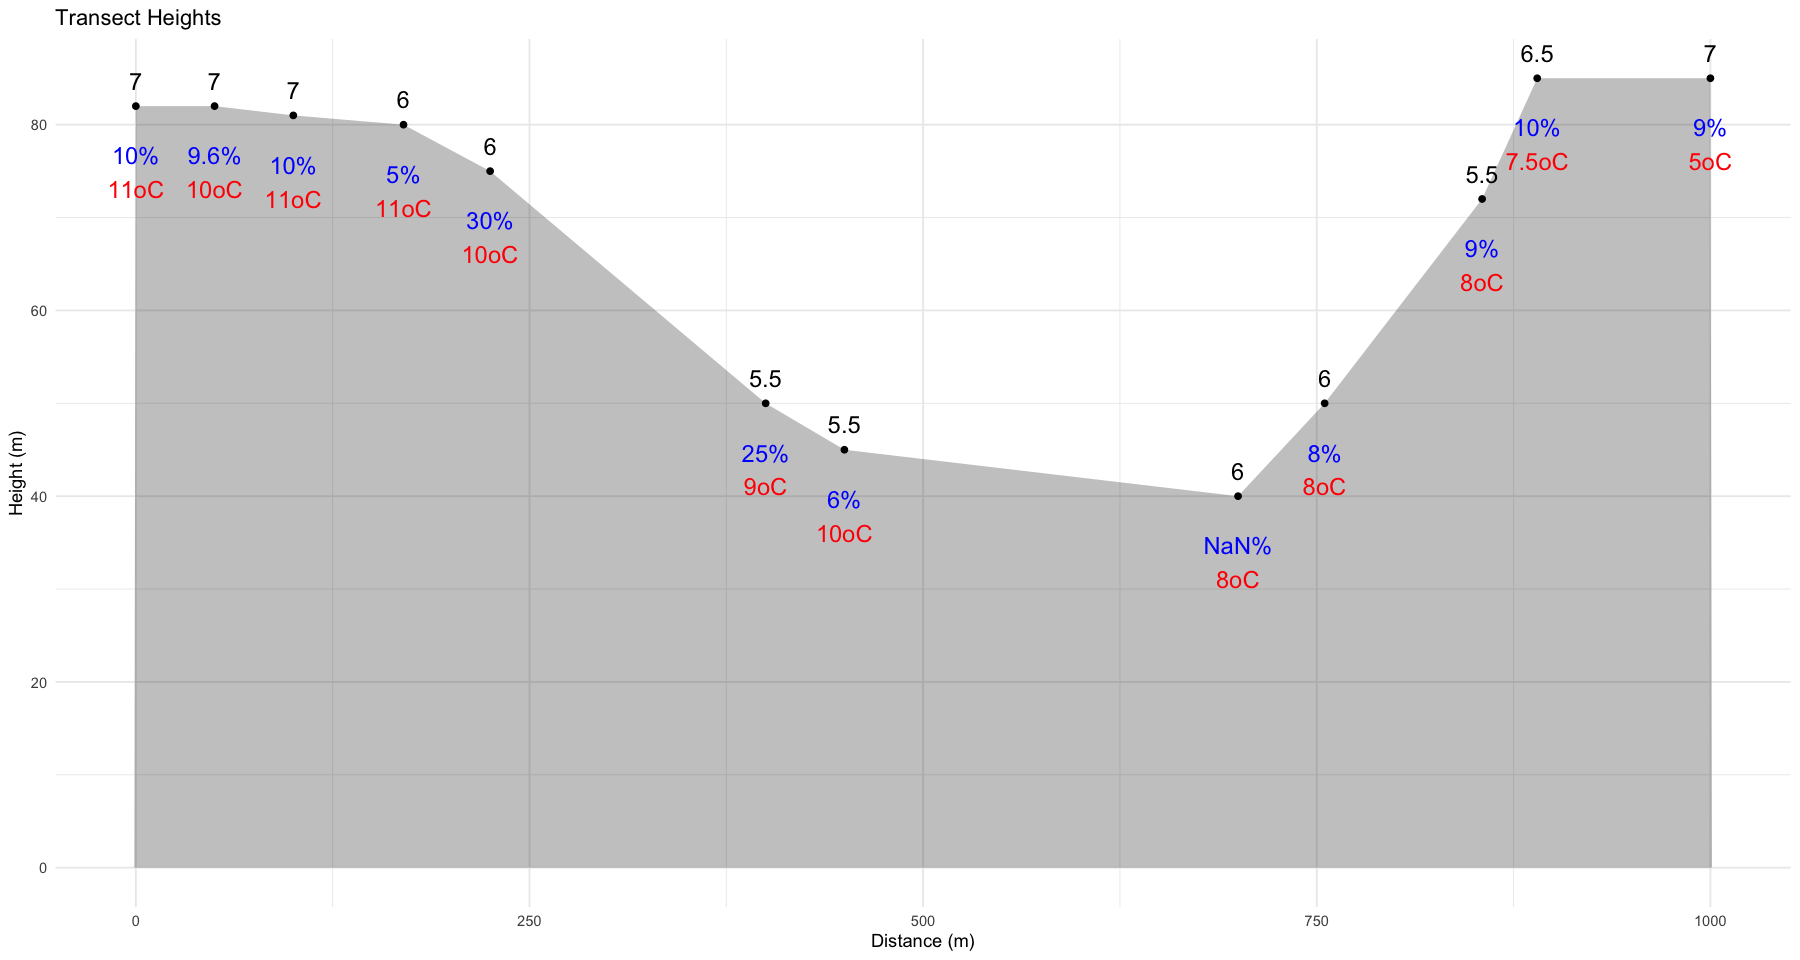

In [9]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(data_bangor) +
  geom_area(aes(x = Distance..m., y = Height..m.), alpha = 0.3) +
  geom_point(aes(x = Distance..m., y = Height..m.)) +
  geom_text(aes(x = Distance..m., y = Height..m., label = pH), 
            vjust = -1, size = 5, color = "black") +
  geom_text(aes(x = Distance..m., y = Height..m., label = paste0(Water.Content, "%")), 
            vjust = +3.4, size = 5, color = "blue") +
  geom_text(aes(x = Distance..m., y = Height..m., label = paste0(Soil.Temp, "oC")), 
            vjust = +5.4, size = 5, color = "red") +
  labs(title = "Transect Heights",
       x = "Distance (m)",
       y = "Height (m)") +
  theme_minimal()



# Range Calculations #

Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."


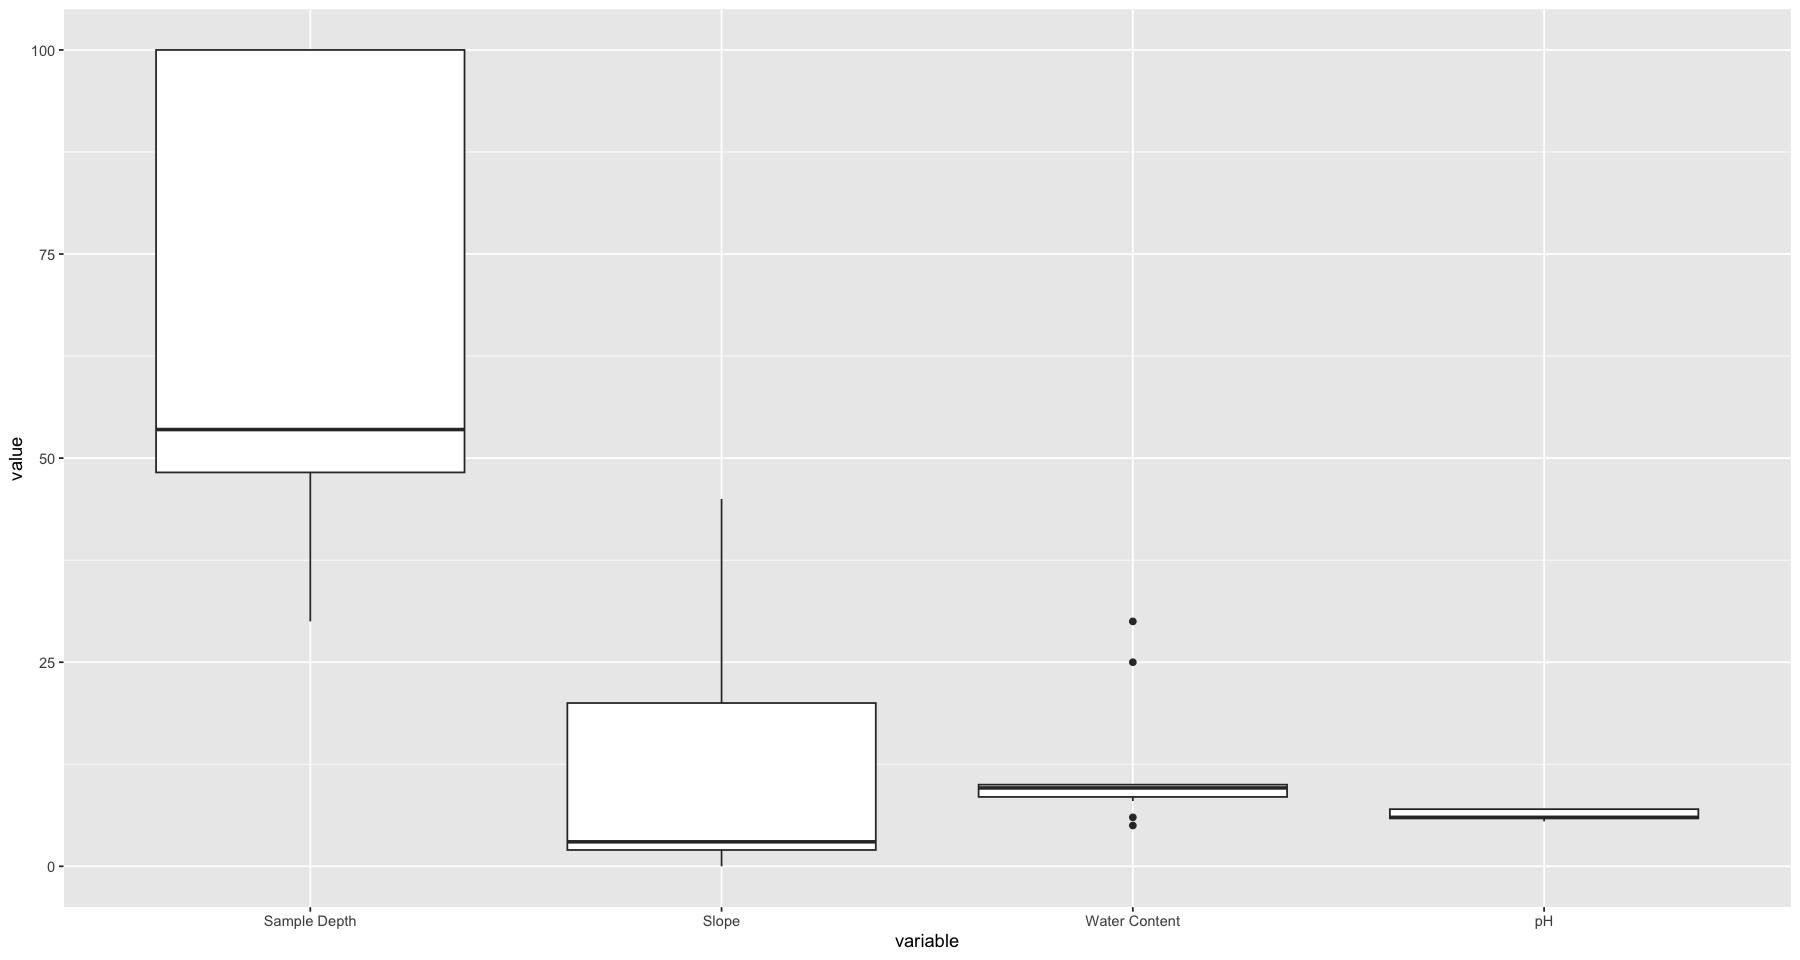

In [10]:
# Combine pH and Slope into a single vector
combined_values <- c(data_bangor$pH, data_bangor$Sample.Depth..cm., data_bangor$Slope, data_bangor$Water.Content)

# Create a factor variable to distinguish between pH and Slope
variable <- factor(rep(c("pH", "Sample Depth", "Slope", "Water Content"), each = nrow(data_bangor)))

# Combine the data into a new dataframe
combined_data <- data.frame(value = combined_values, variable = variable)

# Create the box plot
ggplot(data = combined_data, aes(x = variable, y = value)) +
  geom_boxplot()


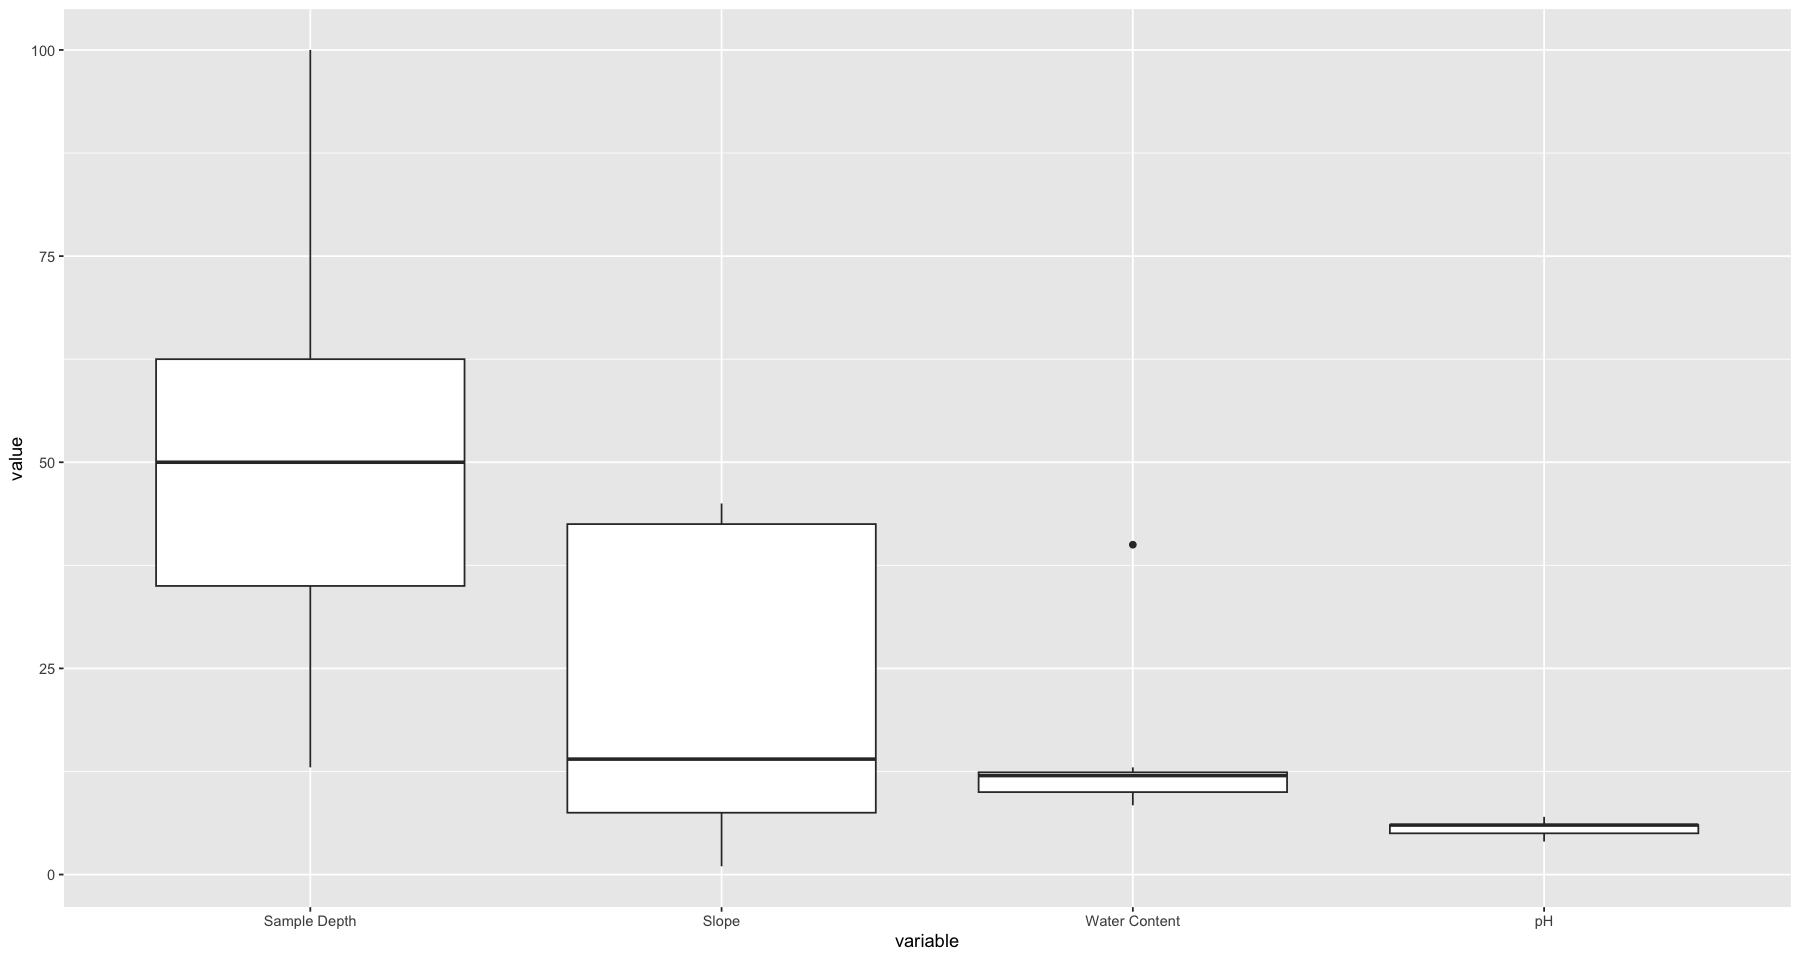

In [11]:
# Combine pH and Slope into a single vector
combined_values <- c(data_peris$pH, data_peris$Sample.Depth..cm., data_peris$Slope, data_peris$Water.Content)

# Create a factor variable to distinguish between pH and Slope
variable <- factor(rep(c("pH", "Sample Depth", "Slope", "Water Content"), each = nrow(data_peris)))

# Combine the data into a new dataframe
combined_data <- data.frame(value = combined_values, variable = variable)

# Create the box plot
ggplot(data = combined_data, aes(x = variable, y = value)) +
  geom_boxplot()

In [12]:
summary(data_bangor)

       X          Distance..m.      Height..m.          pH       
 Min.   : 1.00   Min.   :   0.0   Min.   :40.00   Min.   :5.500  
 1st Qu.: 3.75   1st Qu.: 152.5   1st Qu.:50.00   1st Qu.:5.875  
 Median : 6.50   Median : 425.0   Median :77.50   Median :6.000  
 Mean   : 6.50   Mean   : 466.2   Mean   :68.92   Mean   :6.250  
 3rd Qu.: 9.25   3rd Qu.: 780.0   3rd Qu.:82.00   3rd Qu.:7.000  
 Max.   :12.00   Max.   :1000.0   Max.   :85.00   Max.   :7.000  
                                                                 
 Sample.Depth..cm. Sedimentation.Time..mins.  Soil.Type          Ambient.Temp 
 Min.   : 30.00    Min.   : 3.00             Length:12          Min.   : 7.0  
 1st Qu.: 48.25    1st Qu.:13.50             Class :character   1st Qu.: 9.0  
 Median : 53.50    Median :18.50             Mode  :character   Median :10.5  
 Mean   : 68.50    Mean   :27.50                                Mean   :10.5  
 3rd Qu.:100.00    3rd Qu.:46.75                                3rd Qu.:12.0 

In [13]:
summary(data_peris)

       X              pH        Sample.Depth..cm. Sedimentation.Time..mins.
 Min.   : 1.0   Min.   :4.000   Min.   : 13.00    Min.   : 2.00            
 1st Qu.: 3.5   1st Qu.:5.000   1st Qu.: 35.00    1st Qu.: 8.00            
 Median : 6.0   Median :6.000   Median : 50.00    Median :15.00            
 Mean   : 6.0   Mean   :5.727   Mean   : 50.09    Mean   :14.45            
 3rd Qu.: 8.5   3rd Qu.:6.000   3rd Qu.: 62.50    3rd Qu.:18.50            
 Max.   :11.0   Max.   :7.000   Max.   :100.00    Max.   :30.00            
  Soil.Type          Ambient.Temp       Slope       Water.Content  
 Length:11          Min.   : 9.00   Min.   : 1.00   Min.   : 8.40  
 Class :character   1st Qu.: 9.75   1st Qu.: 7.50   1st Qu.:10.00  
 Mode  :character   Median :10.00   Median :14.00   Median :12.00  
                    Mean   :10.27   Mean   :21.82   Mean   :13.78  
                    3rd Qu.:11.00   3rd Qu.:42.50   3rd Qu.:12.40  
                    Max.   :11.50   Max.   :45.00   Max.   :

# **Data Summary** #

The data frames for Bangor and Nant Peris transects provide valuable insights into the soil characteristics observed in these distinct geographic locations.

## Bangor Transect ##
The Bangor transect covers a range of 12 sample points along the valley, with sample depths varying from 30cm to 100cm. The pH levels range from 5.5 to 7, indicating a slightly acidic to neutral environment. The sedimentation times vary widely, from 3 to 57 minutes, suggesting differences in sedimentation rates. In terms of soil type, a variety including silt, clay, and combinations thereof were recorded. Ambient temperatures range from 7°C to 13°C, with corresponding soil temperatures ranging from 5°C to 11°C. The slope angles vary considerably, from minimal inclines to steeper terrains, reaching up to 45 degrees. Water content, an important factor influencing soil behavior, ranges from 5% to 30%.

## Nant Peris Transect ##
In contrast, the Nant Peris transect consists of 11 sample points, covering depths from 13cm to 100cm. The pH levels range from 4 to 7, indicating a broader range from acidic to neutral. Sedimentation times vary between 2 and 30 minutes, indicating potential differences in sediment transport. Soil types observed include gravel, sand, clay, and various combinations. The ambient temperatures range from 9°C to 11.5°C, although soil temperatures are missing. The slope angles in Nant Peris are notably steeper, ranging from 1 degree to 45 degrees. Water content ranges from 8.4% to 40%, suggesting potentially higher moisture retention.

In summary, while both transects share similarities in terms of sample depth variation and soil type diversity, they exhibit notable differences in pH levels, sedimentation times, and environmental conditions such as ambient temperature, slope angles, and water content. These distinctions likely arise from the unique topographical features of the respective valleys, emphasizing the influence of geographical characteristics on soil properties.

# **Soil Composition**
##### Overall, these two locations have different compositions of soil types. Bangor has a wider variety, whereas Nant Peris seems to have a more limited range of soil types with a focus on gravel, sand, and clay-based compositions. Additionally, both locations have a notable presence of clay in their soil composition.

##### At the time I did not take photos of the soil samples (only 35mm films were available at the time) so i drew them. I also did not classify the soil qualities in a way which made it easy to compare samples from both transects.

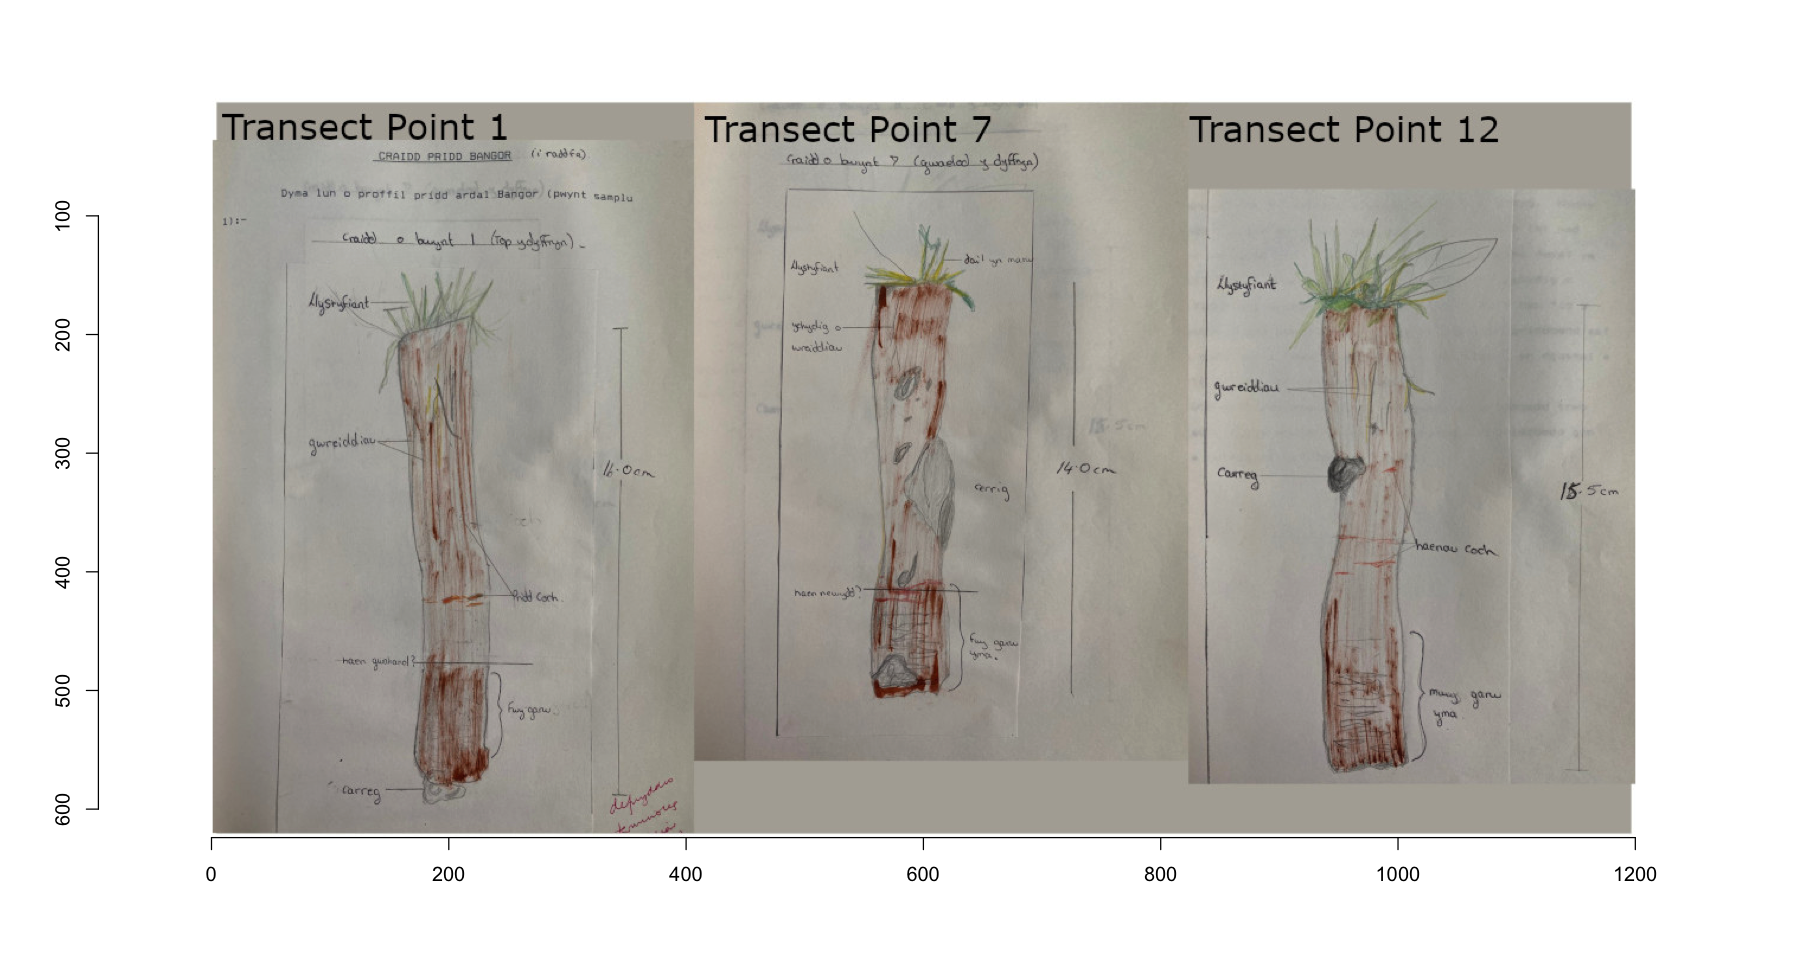

In [14]:
bangor_soil_sketches <- load.image("./soils_scaled.jpg") ;
plot(bangor_soil_sketches)

In [15]:
ggplot(data_bangor) +
  geom_area(aes(x = Distance..m., y = Height..m., fill = Transect), alpha = 0.3) +
  geom_point(aes(x = Distance..m., y = Height..m.)) +
  geom_text(aes(x = Distance..m., y = Height..m., label = Slope), 
            vjust = -1, size = 3, color = "black") +
  labs(title = "Transect Heights",
       x = "Distance (m)",
       y = "Height (m)") +
  theme_minimal()


ERROR while rich displaying an object: Error in `geom_area()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error:
! object 'Transect' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


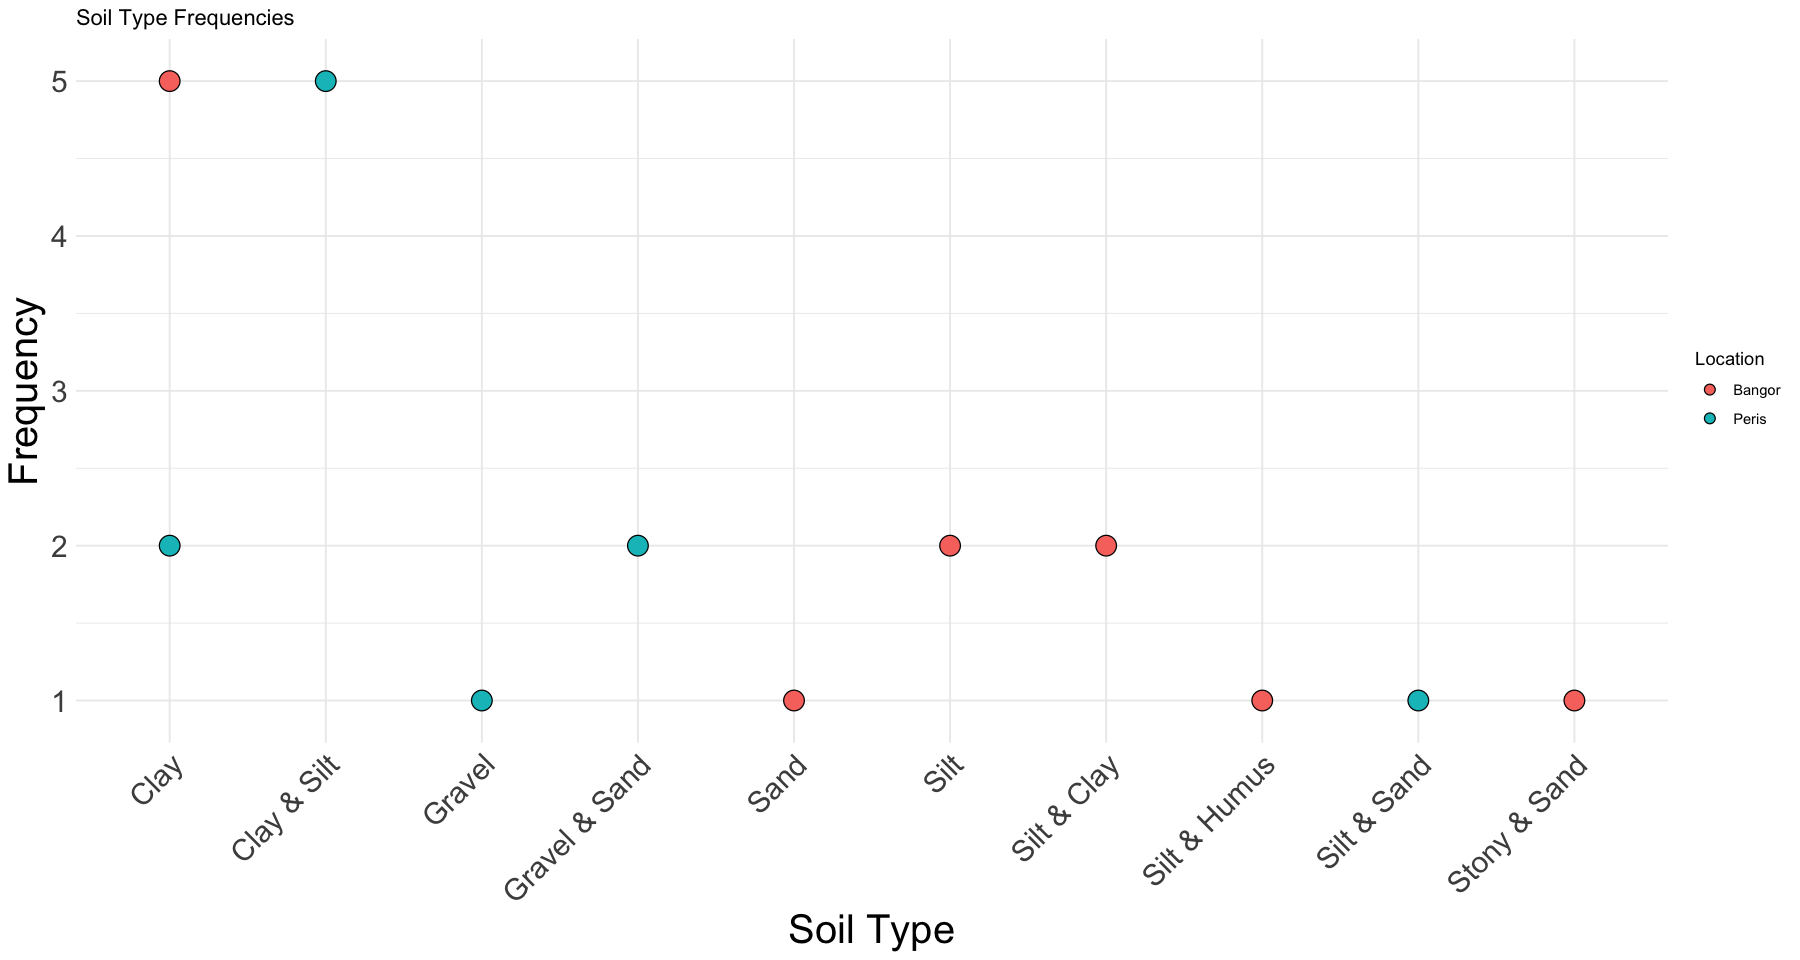

In [16]:
# Assuming you have data frames data_bangor and data_peris with a column named Soil.Type

# Create frequency tables
freq_table_bangor <- sort(table(data_bangor$Soil.Type))
freq_table_peris <- sort(table(data_peris$Soil.Type))

# Combine the frequency tables into one data frame
combined_freq <- data.frame(Location = c(rep("Bangor", length(freq_table_bangor)), rep("Peris", length(freq_table_peris))),
                            Soil.Type = c(names(freq_table_bangor), names(freq_table_peris)),
                            Frequency = c(freq_table_bangor, freq_table_peris))

# Create the side-by-side dot plot
ggplot(combined_freq, aes(x = Soil.Type, y = Frequency, fill = Location)) +
  geom_dotplot(binaxis = "y", stackdir = "center", dotsize = 1) +
  labs(title = "Soil Type Frequencies", x = "Soil Type", y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels by 45 degrees
        axis.text = element_text(size = 18),               # Enlarge axes font size
        axis.title = element_text(size = 24))

# **Univariate Profiling** #

## Exploring Correlation with a Pairs Plot ##
One of the initial steps in exploring relationships between variables is to create a pairs plot, also known as a scatterplot matrix. A pairs plot allows us to visually examine the pairwise correlations between different variables in our dataset. Each combination of variables is represented as a scatterplot, enabling us to identify potential patterns and trends. This visualization is invaluable for identifying potential relationships and dependencies that may exist within the data. Once we've generated the pairs plot, we can further analyze the patterns and consider more advanced statistical techniques to quantify the correlations we observe.

In [17]:
# Remove the Soil.Type column from the copies
data_bangor_copy$Soil.Type <- NULL
data_bangor_copy$Soil.Temp <- NULL
data_peris_copy$Soil.Type <- NULL
data_peris_copy$Soil.Temp <- NULL

ERROR: Error: object 'data_bangor_copy' not found


In [ ]:
# Select relevant columns for correlation analysis
bangor_data_r <- data_bangor[, c("pH", "Sample.Depth..cm.", "Sedimentation.Time..mins.", "Ambient.Temp", "Soil.Temp", "Slope", "Water.Content")]

# Calculate correlation matrix
correlation_matrix <- cor(bangor_data_r)

# Print the correlation matrix
print(correlation_matrix)

### correlation coefficient ###
The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

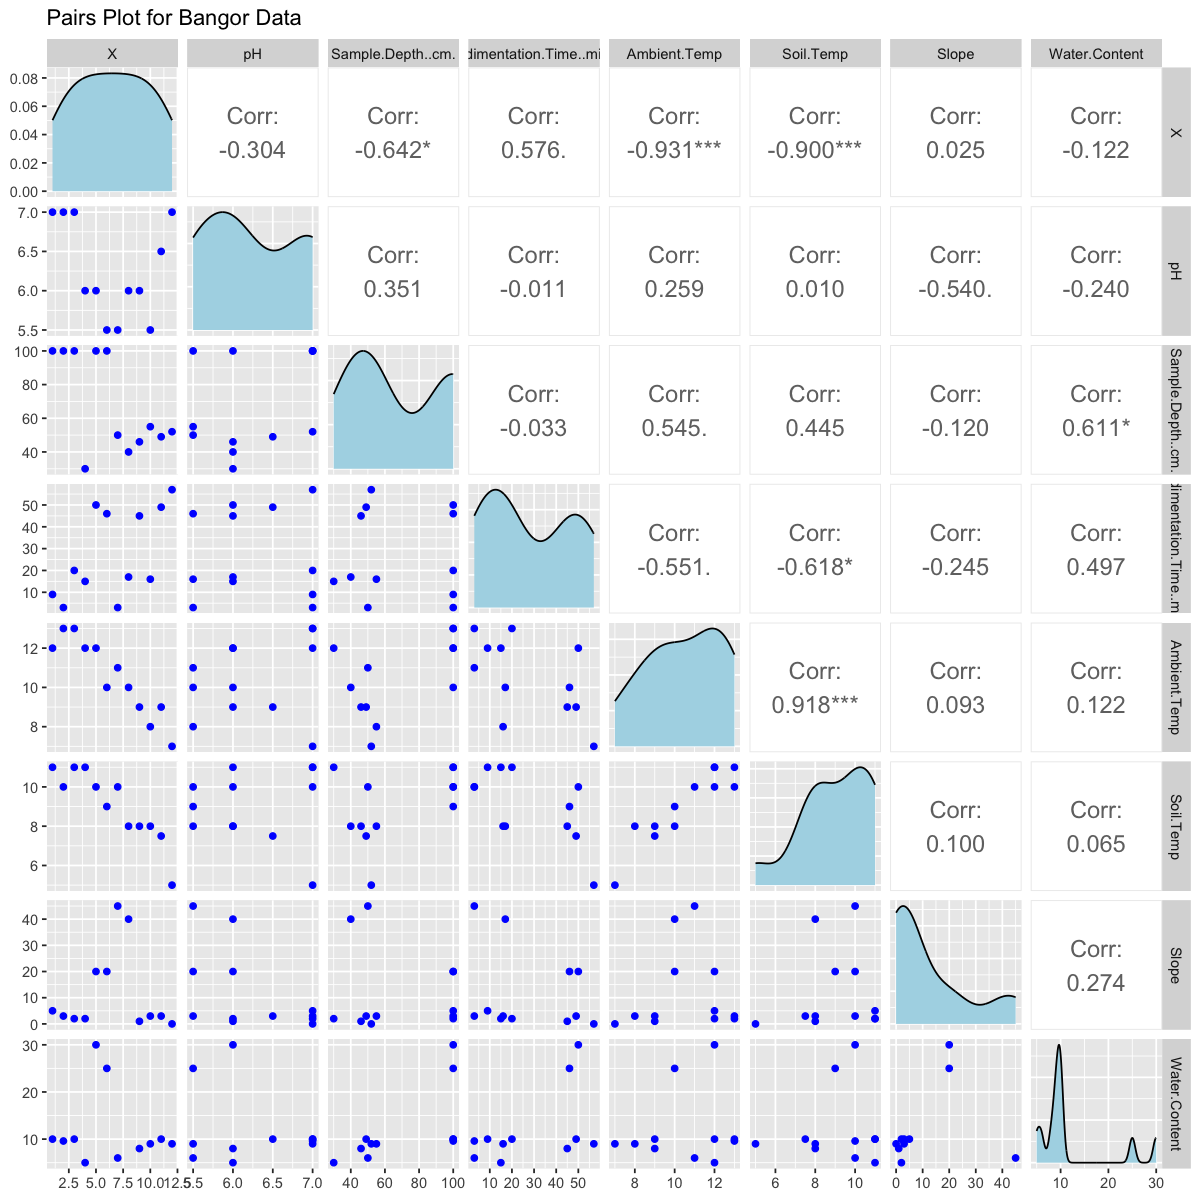

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
ggp = ggpairs(data_bangor_copy, 
        title = "Pairs Plot for Bangor Data",
        upper = list(continuous = wrap("cor", size = 5)),
        lower = list(continuous = wrap("points", size = 1.5, color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))
suppressWarnings(print(ggp))

#### **Strong correlations from the Bangor Plot** ####
The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

- **Location (X) and Ambient Temperature**: correlation of -0.931 suggests that as the sample points or locations progress, the ambient temperature tends to decrease.

- **Location and Soil Depth**: correlation of -0.64 suggests that when moving from one sample point to another, there is a tendency for the soil depth to decrease. 

- **pH and Slope**: The correlation is approximately -0.54 suggeststing that higher pH values are associated with lower slopes e.g. at the bottom of the valley.

- **pH and Sample Depth**: There is a strong negative correlation indicating that deeper samples are more acidic which is also related to being at the bottom of the valley.

- **pH and Water Content**: A strong negative correlation indicates that higher water content is associated with lower pH values.


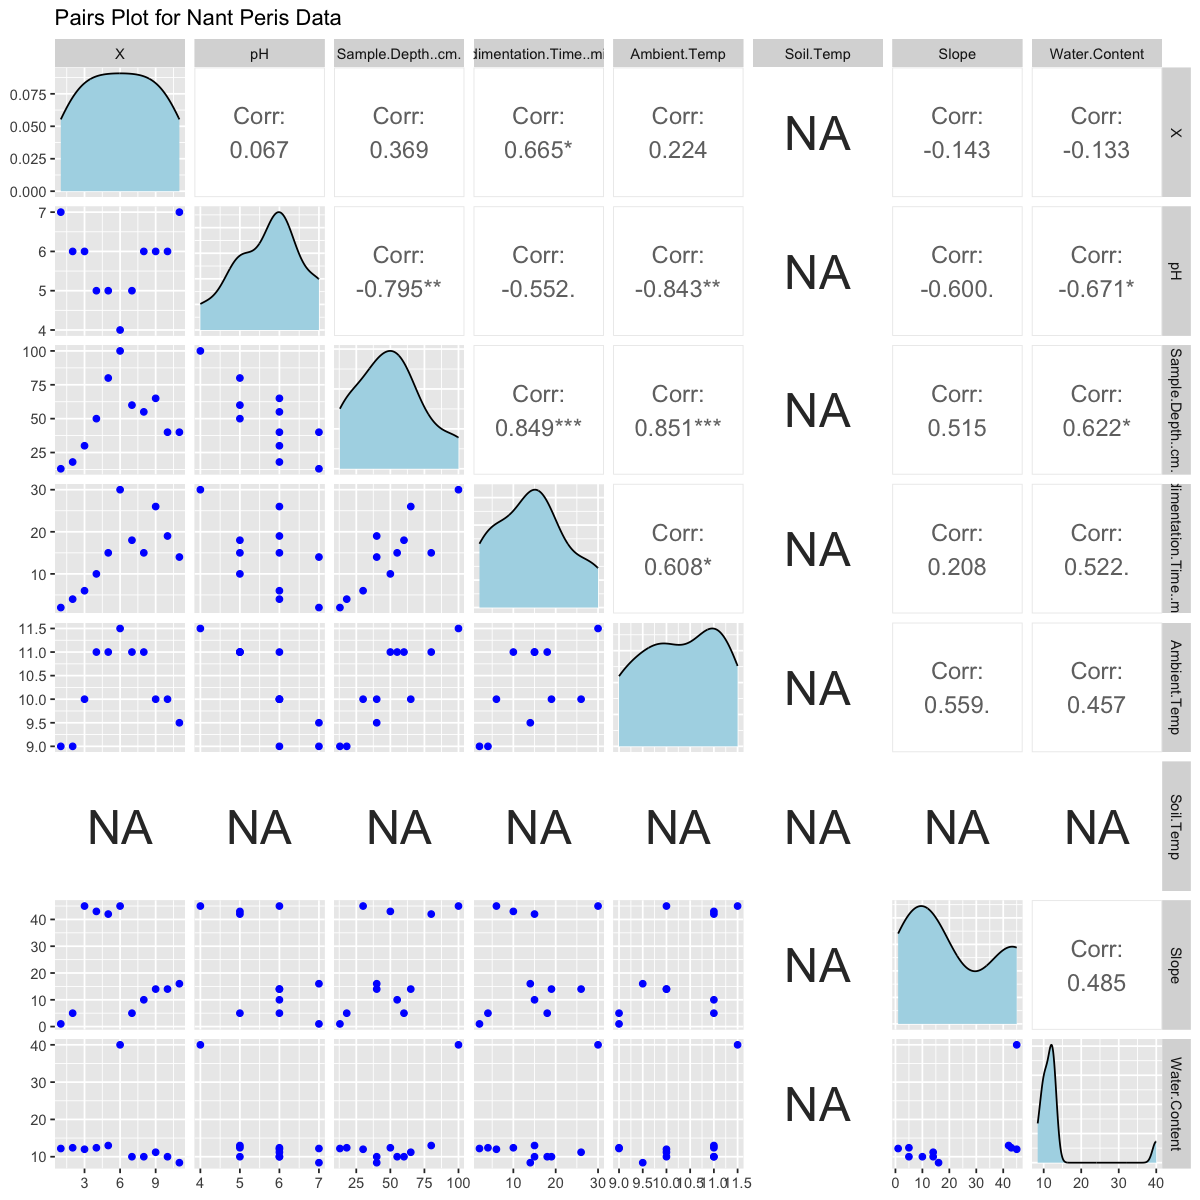

In [ ]:
ggp = ggpairs(data_peris_copy, 
        title = "Pairs Plot for Nant Peris Data",
        upper = list(continuous = wrap("cor", size = 5)),
        lower = list(continuous = wrap("points", size = 1.5, color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))
suppressWarnings(print(ggp))

#### **Strong correlations from the Nant Peris Plot** ####

- **pH and Sedimentation Time** (minutes)**: A moderate negative correlation suggests predominantly clay soils are more acidic.

- **pH and Slope**: There is a moderate negative correlation of approximately -0.600 between pH and slope. This suggests that steeper slopes are associated with lower pH values and that the most acidic region is again at the bottom of the valley.

- **pH and Soil Depth**: There is a strong negative correlation indicating that deeper samples are more acidic which is also related to being at the bottom of the valley.

- **pH and Water Content**: There is a strong negative correlation of approximately -0.671 between pH and water content. This indicates that higher water content is associated with more acidic conditions.

In [ ]:
# Select relevant columns for correlation analysis
peris_data_r <- data_peris[, c("pH", "Sample.Depth..cm.", "Sedimentation.Time..mins.", "Ambient.Temp", "Soil.Temp", "Slope", "Water.Content")]

# Calculate correlation matrix
correlation_matrix <- cor(peris_data_r)

# Print the correlation matrix
print(correlation_matrix)

                                  pH Sample.Depth..cm.
pH                         1.0000000        -0.7949855
Sample.Depth..cm.         -0.7949855         1.0000000
Sedimentation.Time..mins. -0.5516585         0.8492840
Ambient.Temp              -0.8428256         0.8512068
Soil.Temp                         NA                NA
Slope                     -0.6004466         0.5148654
Water.Content             -0.6708396         0.6216422
                          Sedimentation.Time..mins. Ambient.Temp Soil.Temp
pH                                       -0.5516585   -0.8428256        NA
Sample.Depth..cm.                         0.8492840    0.8512068        NA
Sedimentation.Time..mins.                 1.0000000    0.6084703        NA
Ambient.Temp                              0.6084703    1.0000000        NA
Soil.Temp                                        NA           NA         1
Slope                                     0.2081450    0.5593289        NA
Water.Content                      

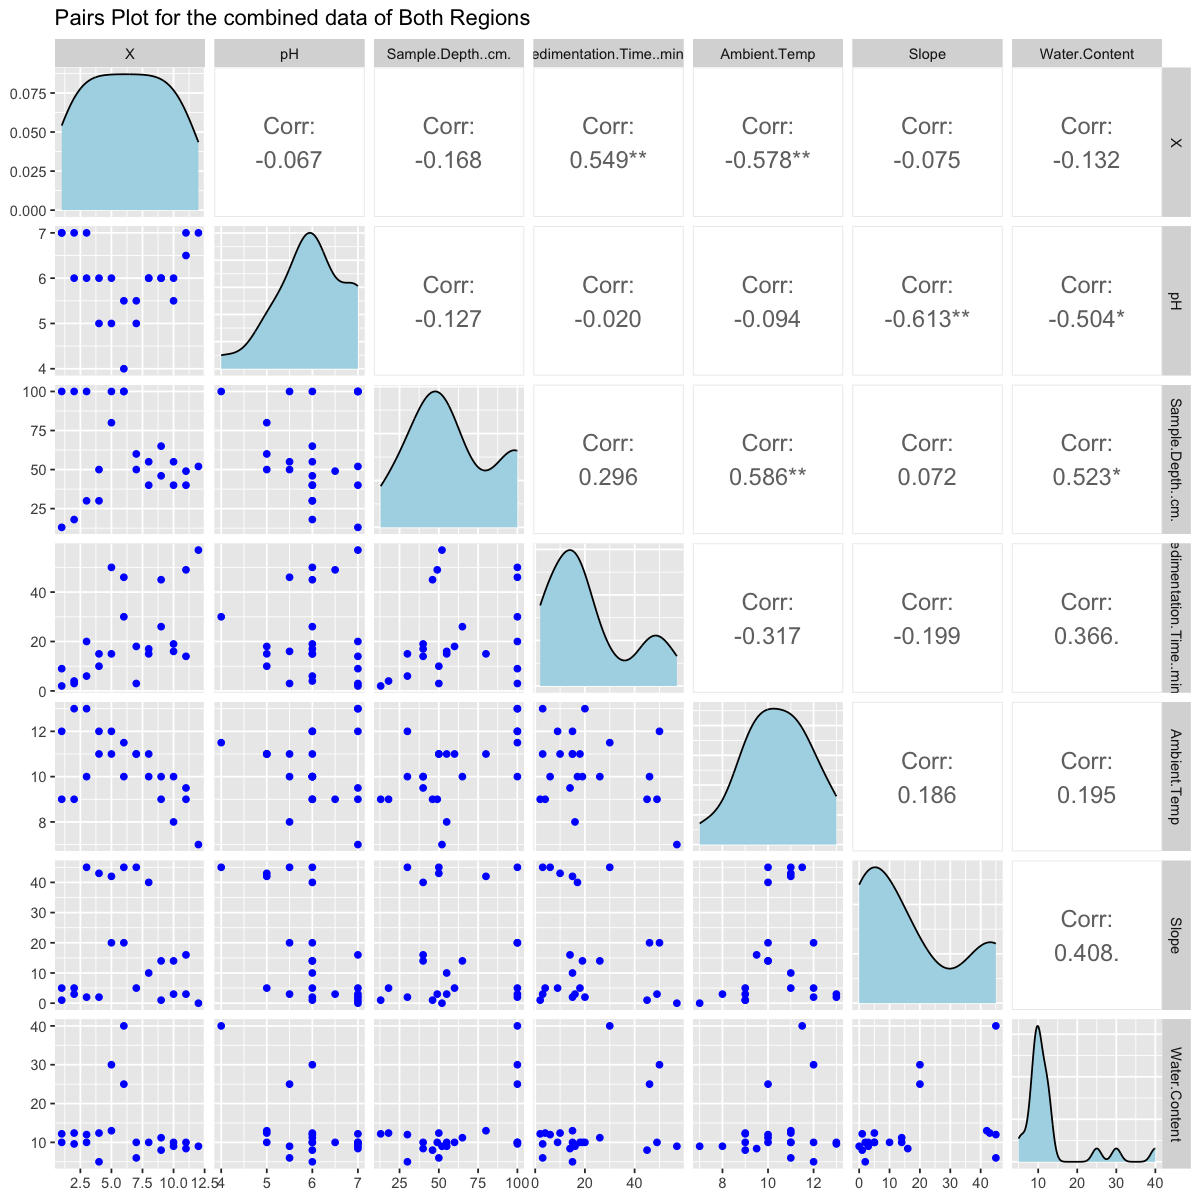

In [ ]:
combined_data <- rbind(data_bangor_copy, data_peris_copy)

ggp = ggpairs(combined_data, 
        title = "Pairs Plot for the combined data of Both Regions",
        upper = list(continuous = wrap("cor", size = 5)),
        lower = list(continuous = wrap("points", size = 1.5, color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))
suppressWarnings(print(ggp))

### Combining Both Pair Plots ###

- **pH and Sample Depth**: The correlation is approximately -0.795, which suggests that as sample depth increases, pH tends to decrease. This trend holds across both datasets.

- **pH and Water Content**: This negative correlation is consistent across both the Bangor and Nant Peris datasets and suggests that areas with higher water content may have more acidic soil conditions. 

# **Box Plots** #

### 1. pH Levels ###

Bangor Transect: The pH levels in Bangor range from 5.5 to 7, with a mean of approximately 6.25. The majority of observations fall within the range of 5.875 to 7.
Nant Peris Transect: The pH levels in Nant Peris vary from 4 to 7, with a mean of approximately 5.73. The range is broader, indicating a wider pH variability compared to Bangor.

### 2. Sample Depth ###
Bangor Transect: Sample depths range from 30cm to 100cm, with a mean of approximately 68.5cm. The majority of observations are spread out within this range.
Nant Peris Transect: Sample depths span from 13cm to 100cm, with a mean of approximately 50.1cm. Similar to Bangor, the observations are distributed across this range.

### 3. Sedimentation Time ###
Bangor Transect: Sedimentation times vary widely, from 3 to 57 minutes, with a mean of approximately 27.5 minutes. There is a significant spread in the data.
Nant Peris Transect: Sedimentation times range from 2 to 30 minutes, with a mean of approximately 14.45 minutes. The spread is narrower compared to Bangor.

### 4. Water Content ###
Bangor Transect: Water content ranges from 5% to 30%, with a mean of approximately 11.96%. There is variability in soil moisture levels.
Nant Peris Transect: Water content spans from 8.4% to 40%, indicating potentially higher moisture retention compared to Bangor.

Distinct patterns emerge that reflect the unique topographical characteristics of each location. Notably, Nant Peris, characterized by steeper slopes and higher moisture levels, exhibits a greater clay-dominated soils. Approximately 45% of the sample points in Nant Peris exhibit clay soils, suggesting that the wetter conditions may favor the retention and accumulation of fine-grained particles. Moreover, Nant Peris also features a notable presence of soils combining gravel and sand, potentially indicative of sedimentation and erosion processes in this dynamic environment.

Conversely, in Bangor, where the terrain is less steep and the soil moisture levels are comparatively lower, clay soils are less prevalent, accounting for approximately 41.67% of the observed soil types. Instead, the dominant soil type in Bangor is clay, constituting 41.67% of the samples. This distribution may be influenced by the U-shaped valley of Bangor, which could provide more stable conditions for the retention of clay-rich soils.

Both locations exhibit a mix of other soil types such as sandy soils, soils rich in humus, and combinations of silt and clay, suggesting a diverse range of soil characteristics.

In summary, the soil type distributions in Bangor and Nant Peris underscore the significant influence of local topography on soil composition. The steeper and wetter conditions in Nant Peris favor the prevalence of clay-rich soils, while the more stable and less steep terrain in Bangor leads to a higher proportion of clay soils. This comparative analysis highlights how the physical nature of the valleys plays a pivotal role in shaping the soil landscape.
